# Capstone Project: Spotify Popularity Prediction And Recommender

General Assembly DSI 19 Capstone Project Adrian Teng

## Project Introduction

1. Using the Spotify datas from kaggle 'data.csv' that contains more than 175k songs collected from Spotify Web API.
2. Coming out with a recommender with 'data.csv' and 'data_genre' from the same source. 

## Problem Statement 

Music have been revolving around life in many different events. An event company hopes to come out with albums that matches their theme of event and keeping the similarities of each song tightly. Especially, during this period of time, when live performance is not allowed due to pandemic and using music playlist will be the most optimal choice.

The goal of this project is to come out with a recommender that will recommend song with similar attributes from Spotify and also find out which model will be best to predict the popularity of a song.

## Executive Summary

In this project, it is splitted into three parts respectively:

- EDA(01_eda)
- Processing & Modelling(02_modelling)
- Clustering & Recommender(03_clustering_recommender)

In the first notebook, 01_eda, exploration was done to better understand the data that will provide assistance in the other two notebooks. 

### Content
- Section 1: Reading and Cleaning
- Section 2: EDA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm
from sklearn.linear_model import LinearRegression 
import time 
import math
from sklearn import preprocessing
from sklearn.feature_selection import RFE



## Section 1: Reading and cleaning spotify data

In [2]:
#load datasets
data = pd.read_csv('./datasets/data.csv')
data_gen = pd.read_csv('./datasets/data_w_genres.csv')

In [3]:
data.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [4]:
data_gen.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [5]:
# check the data size
data.shape

(170653, 19)

In [6]:
data_gen.shape

(28680, 16)

In [7]:
# check the types for each columns
data.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [8]:
# check for nans
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [9]:
#check for nans
data_gen.isnull().sum()

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

## Section 2: EDA

### Looking into the correlation of the spotify data

<AxesSubplot:>

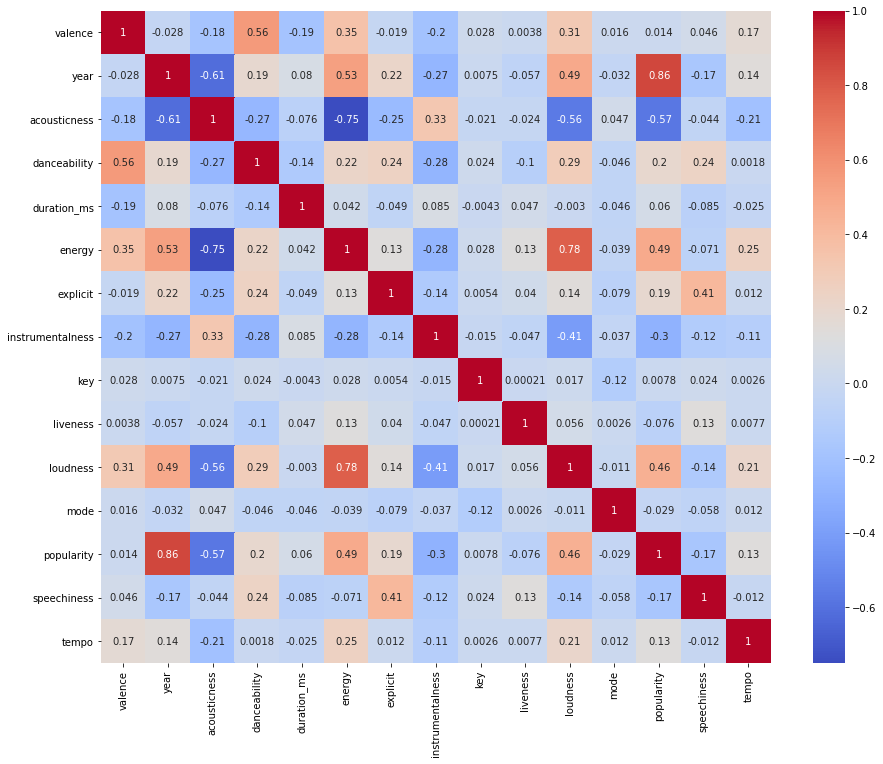

In [10]:
#plotting the correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm')

The dataset has very low correlation, most of the features are not correlated.

Features that are greater than 0.5 in correlation:
- popularity and year
- loudness and energy
- year and energy/loudness



### The distribution of each features



Text(0, 0.5, ' ')

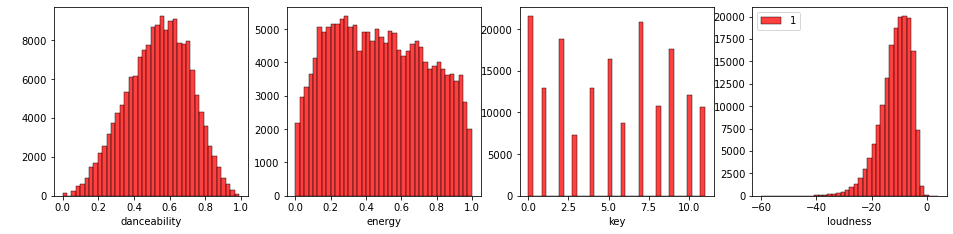

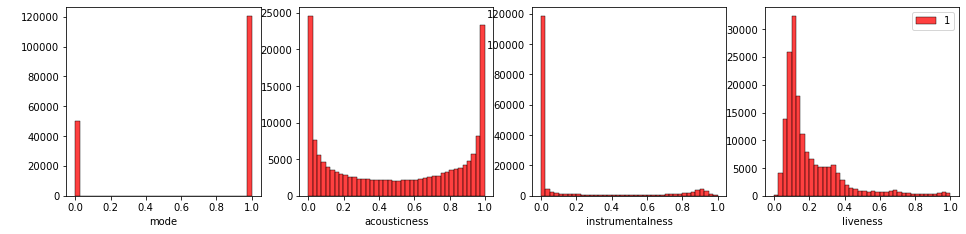

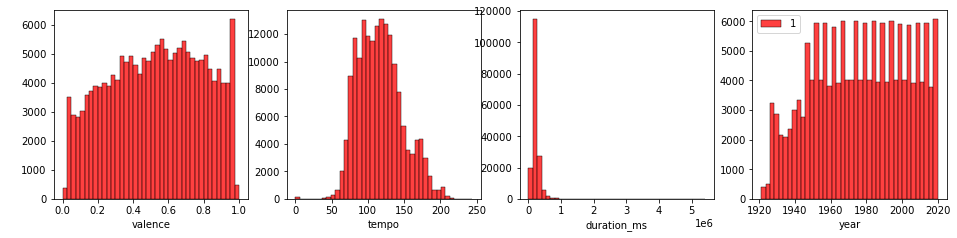

In [11]:
#plotting the distribution for each columns
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(data['danceability'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,2)
sns.histplot(data['energy'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,3)
sns.histplot(data['key'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,4)
sns.histplot(data['loudness'], color='red', bins=40)
plt.legend((1,0))
plt.ylabel(" ")

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(data['mode'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,2)
sns.histplot(data['acousticness'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,3)
sns.histplot(data['instrumentalness'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,4)
sns.histplot(data['liveness'], color='red', bins=40)
plt.legend((1,0))
plt.ylabel(" ")


plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(data['valence'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,2)
sns.histplot(data['tempo'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,3)
sns.histplot(data['duration_ms'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,4)
sns.histplot(data['year'], color='red', bins=40)
plt.legend((1,0))
plt.ylabel(" ")

We can see that there is distribution for features like acousticness, danaceability, energy, speechiness, liveness, valence.

### The trend of audio characteristics over the years

Text(0.5, 0, 'Year')

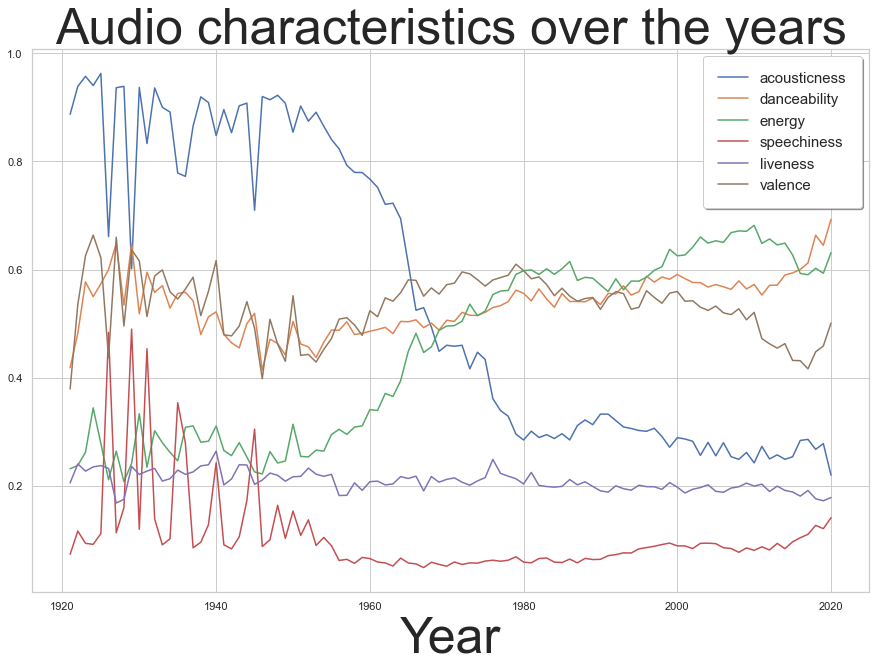

In [12]:
# plotting audio characteristics over the years
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"] 
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over the years', fontsize = 50)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 15}, loc = 'upper right')
ax.set_ylabel('', fontsize = 50)
ax.set_xlabel('Year', fontsize = 50)

Over the years increased:
- energy
- danceability

Over the years decreased:
- acousticness
- speechiness

Over the years no change:
- liveness
- valence
    

Text(0.5, 0, 'Year')

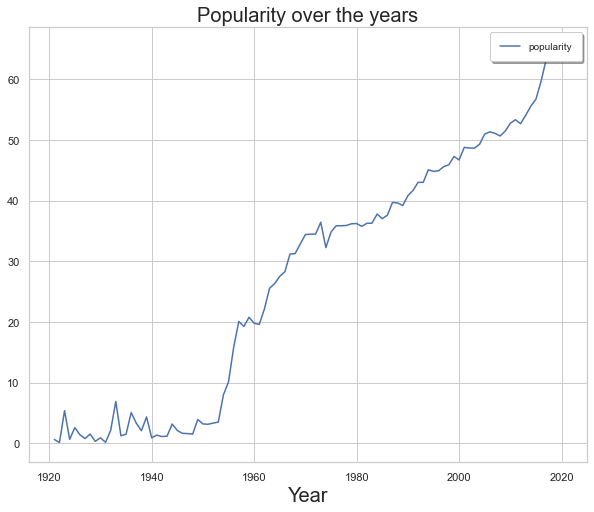

In [13]:
#plotting popularity over years
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Popularity over the years', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
ax.set_ylabel('', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

From the heatmap, we know that there is high relationship between popularity and year, from plot we can deduce that newer the song, the higher the popularity.

Text(0.5, 0, 'energy')

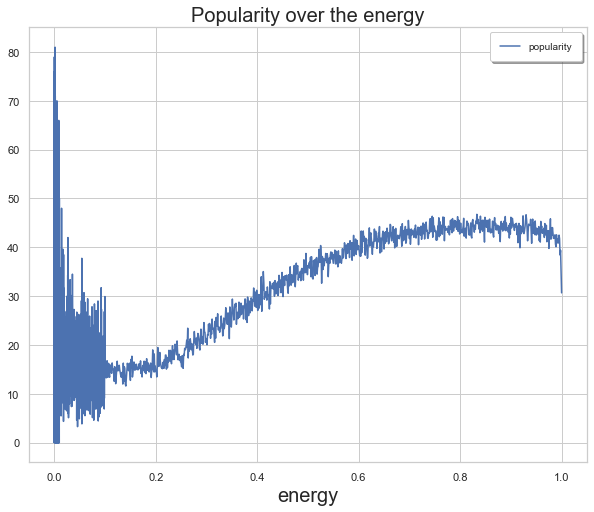

In [25]:
#plotting popularity over energy
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = data.groupby("energy")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Popularity over the energy', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
ax.set_ylabel('', fontsize = 20)
ax.set_xlabel('energy', fontsize = 20)

Text(0.5, 0, 'danceability')

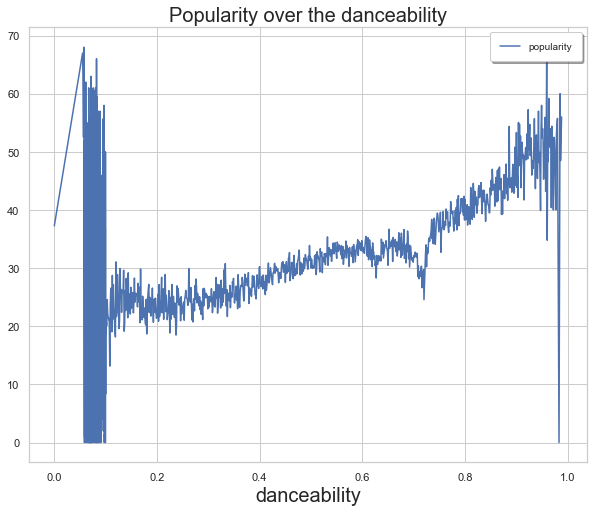

In [26]:
#plotting popularity over danceability
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = data.groupby("danceability")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Popularity over the danceability', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
ax.set_ylabel('', fontsize = 20)
ax.set_xlabel('danceability', fontsize = 20)

Text(0.5, 0, 'acousticness')

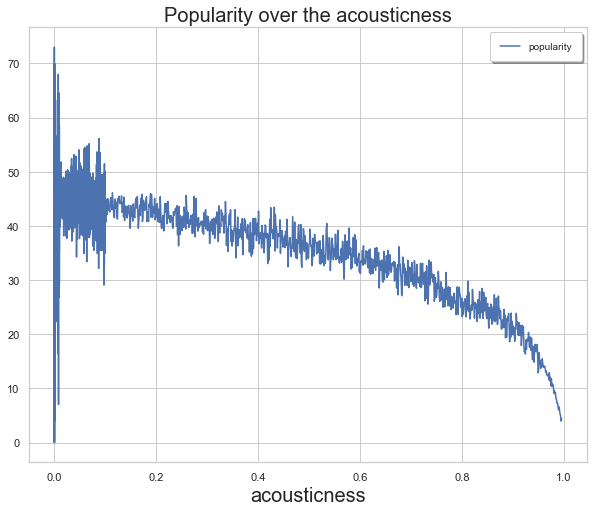

In [27]:
#plotting popularity over acousticness
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = data.groupby("acousticness")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Popularity over the acousticness', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
ax.set_ylabel('', fontsize = 20)
ax.set_xlabel('acousticness', fontsize = 20)

Even though they are many outliners when plotting against popularity with audio charactistics, but we can see there are similar trends with years.

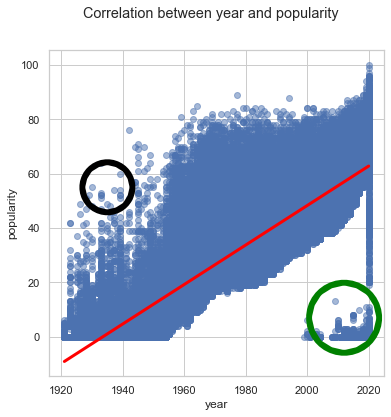

In [14]:
#scatterplot for popularity and year 
x1 = data["year"].values
y1 = data["popularity"].values

x1 = x1.reshape(x1.shape[0], 1) #reshape the data to fit into regression
y1 = y1.reshape(y1.shape[0], 1)

regr = LinearRegression() 
regr.fit(x1, y1) #lr fit

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between year and popularity")

ax = plt.subplot(1, 1, 1)
ax.scatter(x1, y1, alpha=0.5)
ax.plot(x1, regr.predict(x1), color="red", linewidth=3)
plt.scatter(2012, 7, color="none", edgecolor="green",linewidths=70) #outliners
plt.scatter(1935, 55, color="none", edgecolor="black",linewidths=50) #outliners

plt.xlabel("year")
plt.ylabel("popularity")

plt.show()


### Let take a look at the outliners 

In [15]:
#filtering out the outliners in black circle
pop_old = data[(data.year > 1910) & (data.year < 1950) & (data.popularity > 60) & (data.popularity < 90)]

In [16]:
pop_old.shape

(13, 19)

In [17]:
pop_old[['artists','name']] #artists and names 

,artists,name
2206,"['Billie Holiday', 'Eddie Heywood']",All of Me (with Eddie Heywood & His Orchestra)
4006,"['Bing Crosby', 'Ken Darby Singers', 'John Sco...",White Christmas
4406,['Judy Garland'],Have Yourself A Merry Little Christmas
4606,"['Bing Crosby', 'The Andrews Sisters']",Mele Kalikimaka (Merry Christmas)
4607,['Bing Crosby'],It's Beginning To Look Like Christmas
4608,['Bing Crosby'],I'll Be Home For Christmas
4609,['Bing Crosby'],God Rest Ye Merry Gentlemen
4610,"['Doris Day', 'The Mellomen']",Again (with The Mellomen)
5006,['Gene Autry'],Here Comes Santa Claus (Right Down Santa Claus...
5007,['Gene Autry'],Rudolph the Red-Nosed Reindeer


Most 30s to 50s songs that are related to 'Christmas' are still popular

In [18]:
#filtering out the outliners in green circle
unpop_new = data[(data.year > 2000) & (data.year < 2020) & (data.popularity > 0) & (data.popularity < 10)]

In [19]:
unpop_new[['artists','name']].head(120) #artist and names

,artists,name
72789,['Palaraga'],Angel's Next Day
72829,"['Thomas Hayes', 'Kyler England']",Golden
120841,['Etoile'],Ama La Vita - Life
121749,"['Allan Thomas', 'Nathan Aweau', 'Peter Moon',...",Island Girl
121759,"['Petroloukas Chalkias', 'Nikos Mattheou', 'Gi...",Aftoshediasmos Se Iho Plagio B
...,...,...
155221,['Genix'],Open Your Eyes
155222,['Andrew Bayer'],Parallels pt. 2
155227,"['Michael Murica', 'Matt Aubrey', 'Lucius Lowe']",Static Anthem - Lucius Lowe Radio Edit
155257,['Skyramid'],Bella Ciao


In [20]:
data[155256:155258]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
155256,0.668,2019,0.08730,['Sassydee'],0.717,229000,0.807,0,7qUdFt5S4NFasJSYiKfn66,0.000004,10,0.0735,-5.559,0,Firework,0,2019-12-13,0.0312,123.999
155257,0.417,2019,0.00186,['Skyramid'],0.540,257273,0.705,0,27oCOTdlcISquG0fiZYzyN,0.000029,4,0.1450,-9.900,1,Bella Ciao,4,2019-10-01,0.0452,132.081


Unpopular song between 2000 to 2020, the song attributes doesn't contribute to it, but rather they are just neglected 
as there are not from popular singer

### Looking at the second highest correlation features

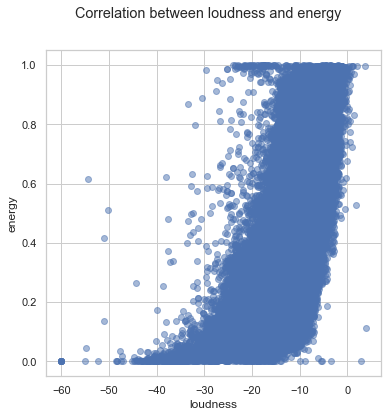

In [21]:
#scatterplot of loudness and energy
x2 = data["loudness"].values
y2 = data["energy"].values

x2 = x2.reshape(x2.shape[0], 1) #reshape to fit into lr
y2 = y2.reshape(y2.shape[0], 1)

regr = LinearRegression()
regr.fit(x2, y2)

fig2 = plt.figure(figsize=(6, 6))
fig2.suptitle("Correlation between loudness and energy")

ax2 = plt.subplot(1, 1, 1)
ax2.scatter(x2, y2, alpha=0.5)


plt.xlabel("loudness")
plt.ylabel("energy")

plt.show()

There isn't any strong correlation, even though it is the second highest in the dataset.